In [3]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("../data/raw/events.csv")
df.head()

,timestamp,visitorid,event,itemid,transactionid
0,1433221332117,257597,view,355908,NaN
1,1433224214164,992329,view,248676,NaN
2,1433221999827,111016,view,318965,NaN
3,1433221955914,483717,view,253185,NaN
4,1433221337106,951259,view,367447,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2756101 entries, 0 to 2756100
Data columns (total 5 columns):
 #   Column         Dtype  
---  ------         -----  
 0   timestamp      int64  
 1   visitorid      int64  
 2   event          object 
 3   itemid         int64  
 4   transactionid  float64
dtypes: float64(1), int64(3), object(1)
memory usage: 105.1+ MB


In [5]:
df.describe()

,timestamp,visitorid,itemid,transactionid
count,2.756101e+06,2.756101e+06,2.756101e+06,22457.000000
mean,1.436424e+12,7.019229e+05,2.349225e+05,8826.497796
std,3.366312e+09,4.056875e+05,1.341954e+05,5098.996290
min,1.430622e+12,0.000000e+00,3.000000e+00,0.000000
25%,1.433478e+12,3.505660e+05,1.181200e+05,4411.000000
50%,1.436453e+12,7.020600e+05,2.360670e+05,8813.000000
75%,1.439225e+12,1.053437e+06,3.507150e+05,13224.000000
max,1.442545e+12,1.407579e+06,4.668670e+05,17671.000000


In [6]:
interactions = pd.read_csv("../data/processed/interactions.csv")
interactions.head()

,user_id,item_id,interaction_score,last_interaction_ts
0,0,67045,1.0,1442004917175
1,0,285930,1.0,1442004589439
2,0,357564,1.0,1442004759591
3,1,72028,1.0,1439487966444
4,2,216305,2.0,1438971463170


In [7]:
interactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2145179 entries, 0 to 2145178
Data columns (total 4 columns):
 #   Column               Dtype  
---  ------               -----  
 0   user_id              int64  
 1   item_id              int64  
 2   interaction_score    float64
 3   last_interaction_ts  int64  
dtypes: float64(1), int64(3)
memory usage: 65.5 MB


In [8]:
interactions.describe()

,user_id,item_id,interaction_score,last_interaction_ts
count,2.145179e+06,2.145179e+06,2.145179e+06,2.145179e+06
mean,7.020306e+05,2.346137e+05,1.391303e+00,1.436478e+12
std,4.056801e+05,1.341163e+05,1.639133e+00,3.372393e+09
min,0.000000e+00,3.000000e+00,1.000000e+00,1.430622e+12
25%,3.505660e+05,1.176730e+05,1.000000e+00,1.433536e+12
50%,7.021130e+05,2.354010e+05,1.000000e+00,1.436529e+12
75%,1.052906e+06,3.503990e+05,1.000000e+00,1.439268e+12
max,1.407579e+06,4.668670e+05,3.080000e+02,1.442545e+12


In [9]:
# Number of unique users and items
n_users = interactions['user_id'].nunique()
n_items = interactions['item_id'].nunique()

print(f'Number of unique users: {n_users}')
print(f'Number of unique items: {n_items}')

Number of unique users: 1407580
Number of unique items: 235061


In [10]:
# Number and percentage of users who made a purchase
purchasing_users = interactions.loc[interactions['interaction_score'] >= 5, 'user_id'].nunique()
pct_users_purchased = purchasing_users / n_users * 100

print(purchasing_users)
print(pct_users_purchased)

37468
2.661873570241123


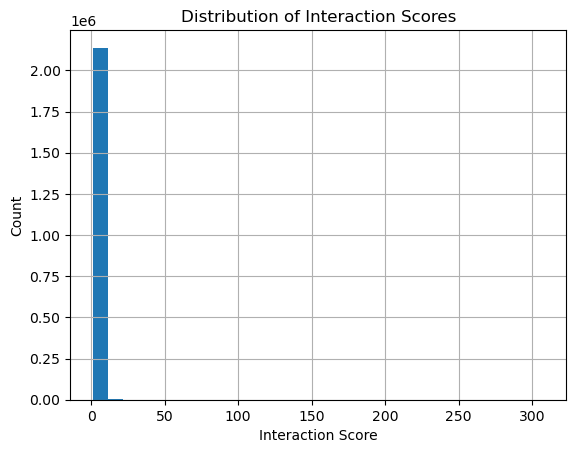

In [11]:
# Distribution of interaction scores
interactions['interaction_score'].hist(bins=30)
plt.title('Distribution of Interaction Scores')
plt.xlabel('Interaction Score')
plt.ylabel('Count')
plt.show()